In [13]:
# Geopandas es una extensión para Pandas que permite trabajar
# con datos geoespaciales.
# Shapely permite crear y modificar datos vectoriales.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import geopandas as gpd

In [14]:
# Leemos un archivo tipo shapefile.

path = "../Material/Clases/Clase 6/"
gdf = gpd.read_file(path + "rha250kcw.shp")

gdf.head()

# Geopandas agrega un tipo de columna especial llamada geometry.

,AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN,geometry
0,1.450592e+11,3.944349e+06,2,1,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1074639.006 2330111.110, 1074636.000..."
1,3.071091e+04,6.600037e+02,3,3,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1057391.103 2338545.818, 1057382.358..."
2,7.596889e+04,1.376205e+03,4,4,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1057840.769 2338075.058, 1057812.272..."
3,1.181878e+06,7.195191e+03,5,5,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1058720.365 2337945.304, 1058821.710..."
4,2.053648e+11,3.278104e+06,6,2,2.0,Noroeste,II,2.066163e+11,3.587920e+06,"POLYGON ((1288972.734 2323826.343, 1288992.739..."


In [15]:
# Algunas RHA están compuestas de varios polígonos (islas, etc.)
gdf[gdf["CLAVE"] == 1].sort_values("AREA", ascending = False)

,AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN,geometry
0,1.450592e+11,3.944349e+06,2,1,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1074639.006 2330111.110, 1074636.000..."
24,9.289460e+08,2.144980e+05,26,24,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1377476.419 1977718.037, 1377513.793..."
66,3.500005e+08,1.323307e+05,68,69,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1196052.547 1845349.818, 1196124.283..."
20,2.624959e+08,9.506130e+04,22,27,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((916617.126 1992748.241, 916829.700 1..."
135,1.791340e+08,8.875868e+04,137,140,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1625521.892 1470826.001, 1625515.263..."
...,...,...,...,...,...,...,...,...,...,...
102,2.273175e+03,1.794987e+02,104,105,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1249656.906 1772669.004, 1249683.537..."
32,2.153507e+03,1.869368e+02,34,45,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1273035.140 1931503.678, 1273045.642..."
119,1.173489e+03,1.268867e+02,121,120,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1585965.828 1584070.438, 1585965.574..."
103,9.481542e+02,1.178995e+02,105,106,1.0,Península de Baja California,I,1.473484e+11,5.183581e+06,"POLYGON ((1249779.907 1772498.373, 1249795.160..."


In [18]:
# Escogemos solo las áreas principales.

# Escogemos para cada cuenca, la zona de mayor área.
gdf_2 = gdf[gdf["CLAVE"] == 1].sort_values("AREA", ascending = False).iloc[0]
for i in range(2, 14):
    gdf_2 = gpd.GeoDataFrame( pd.concat( [ gdf_2,
        gdf[gdf["CLAVE"] == i].sort_values( "AREA", ascending = False).iloc[0]
        ], axis = 1 ) )

# Trasponemos la tabla.
gdf_2 = gdf_2.T

# Reiniciamos el índice.
gdf_2 = gdf_2.reset_index(drop = True)

# Reestablecemos el CRS.
gdf_2 = gdf_2.set_crs(gdf.crs)

# Corregimos el tipo de dato.
gdf_2.iloc[:, 0] = gdf_2.iloc[:, 0].astype(float)
gdf_2.iloc[:, 1] = gdf_2.iloc[:, 1].astype(float)
gdf_2.iloc[:, 2] = gdf_2.iloc[:, 2].astype(int)
gdf_2.iloc[:, 3] = gdf_2.iloc[:, 3].astype(int)
# Guardamos el archivo.
gdf_2.to_file(path + "rha250kcw_sin_islas.shp")

gdf_2.head()

,AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN,geometry
0,1.450592e+11,3.944349e+06,2,1,1.0,Península de Baja California,I,147348379405.0,5183580.98666,"POLYGON ((1074639.006 2330111.110, 1074636.000..."
1,2.053648e+11,3.278104e+06,6,2,2.0,Noroeste,II,206616269151.0,3587919.58619,"POLYGON ((1288972.734 2323826.343, 1288992.739..."
2,1.504927e+11,3.819124e+06,81,71,3.0,Pacífico Norte,III,150500350397.0,3850429.85701,"POLYGON ((1926559.600 1775631.790, 1926620.357..."
3,1.188371e+11,3.910981e+06,277,244,4.0,Balsas,IV,118832035844.0,3910888.79235,"POLYGON ((2444159.145 868207.651, 2444150.641 ..."
4,7.773756e+10,3.302161e+06,359,358,5.0,Pacífico Sur,V,77735750423.800003,3306177.84114,"POLYGON ((2579195.615 672740.569, 2579229.368 ..."


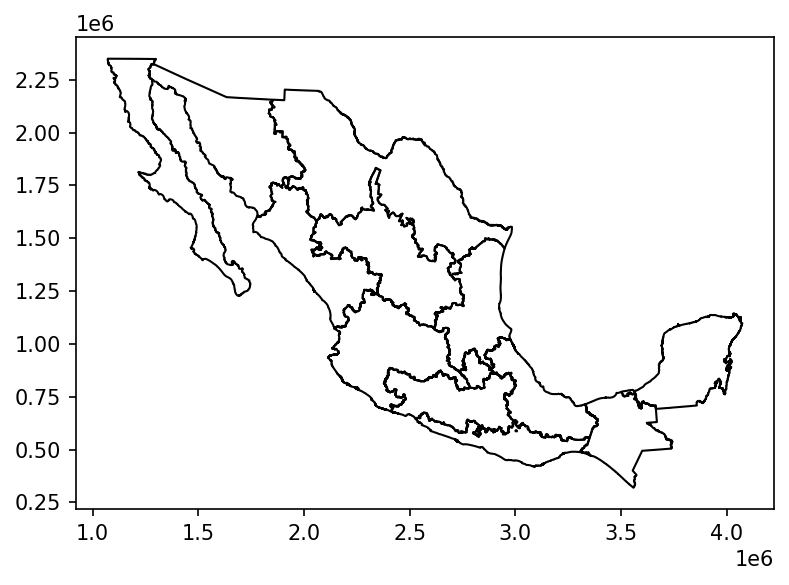

In [17]:
# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_dpi(150) 

gdf_2.plot(ax = ax, color = "None", edgecolor = "k")

fig.tight_layout()
plt.show()